<strong>Дано нелинейное уравнение в пространстве непрерывных функций $C[a; b]$.
    
A. Используя принцип сжимающих операторов, доказать, что данное уравнение
имеет единственное решение $x(t) \in C[a; b]$.
    
B. Методом простых итераций найти приближенное решение этого уравнения с точностью $\varepsilon = 0.01$, используя априорную оценку числа итераций. В качестве ответа предъявить график приближенного решения.</strong>

$x(t) + 3\sqrt[4]{1 + |x(t)|} = \sqrt{t + 1}, [a; b] = [-1; 15]$

<i>A. Используя принцип сжимающих операторов, докажем, что данное уравнение имеет единственное решение $x(t) \in C[-1; 15]$</i>

Представим уравнение следующим образом:

$$x(t) = \sqrt{t + 1} - 3\sqrt[4]{1 + |x(t)|}$$

Рассмотрим оператор 
$$Ф[x]: C[-1; 15] \to C[-1; 15], Ф[x] = \sqrt{t + 1} - 3\sqrt[4]{1 + |x(t)|}.$$

Уравнение $x(t) = \sqrt{t + 1} - 3\sqrt[4]{1 + |x(t)|}$ имеет вид $Ф[x] = x$, его решение – неподвижная точка оператора $Ф$.

Докажем, что оператор $Ф$ сжимающий, используя достаточный признак. Обозначим $Ф[x] = \varphi(t, |x(t)|)$, где $\varphi(t, u) = \sqrt{t + 1} - 3\sqrt[4]{1 + u}$. Очевидно, что функция двух переменных $\varphi(t, u)$ непрерывна на множестве $[-1; 15] \times [0; +\infty)$, непрерывно дифференцируема по переменной $u$, причем при всех $(t, u) \in [-1; 15] \times [0; +\infty)$ справедлива оценка:
$$|\varphi^{'}(t, u)| = |- \frac{0.75}{{(u + 1)}^{0.75}}| \leq \frac{3}{4} \leq 1$$

In [1]:
import sympy as sp
from IPython.display import display

sp.init_printing(use_latex='mathjax')

t = sp.Symbol('t')
u = sp.Symbol('u')

expr = sp.sqrt(t + 1) - 3*(1 + u)**(1/4)
diffed_expr = expr.diff(u)
display(diffed_expr)

             -0.75
-0.75⋅(u + 1)     

Отсюда следует, что оператор $Ф$ сжимающий с коэффициентом сжатия $\alpha = \frac{3}{4}$.
Согласно принципу сжимающих операторов $Ф$ имеет единственную неподвижную точку $x(t) \in C[-1; 15]$, которая и является решением уравнения $x(t) = \sqrt{t + 1} - 3\sqrt[4]{1 + |x(t)|}$.

<i>B. Методом простых итераций найдем приближенное решение уравнения $x(t) = \sqrt{t + 1} - 3\sqrt[4]{1 + |x(t)|}$ с точностью $\varepsilon = 0.01$ и построим его график. Процесс вычислений организуем с помощью априорной оценки числа итераций.</i>

Для произвольного начального приближения $x_0$ последовательность итераций задается рекуррентной формулой $x_n = Ф[x_{n - 1}]$. В данном случае
$$x_n(t) = \sqrt{t + 1} - 3\sqrt[4]{1 + |x_{n - 1}(t)|}$$

Выбираем произвольным образом начальное приближение, например $t_0 = -t^2$ и вычисляем первую итерацию.

In [2]:
xn1 = sp.Symbol('x_{n-1}(t)')
x = sp.sqrt(t - 1) - 3*(sp.Abs(xn1) + 1)**(1/4)
display(x)

t0 = -t**2
t1 = sp.simplify(x.subs(xn1, t0))
display(t1)

  _______                       0.25
╲╱ t - 1  - 3⋅(│x_{n-1}(t)│ + 1)    

                        0.25
  _______     ⎛│ 2│    ⎞    
╲╱ t - 1  - 3⋅⎝│t │ + 1⎠    

$x_1(t) = \sqrt{t - 1} - 3 \left(\left|{t^{2}}\right| + 1\right)^{0.25}$. Найдем априорную оценку $N_{apr}$

In [3]:
import math
from scipy.optimize import minimize_scalar
import numpy as np

def dist(x1, x0):
    rho_func = sp.lambdify(t, sp.Abs(x1 - x0))
    res = minimize_scalar(lambda x: -rho_func(x), bounds=[-1, 15], method='Bounded')
    return sp.Abs(x1 - x0).subs(t, res.x)

def is_enough(alp, x1, x0, eps):
    return (alp/(1 - alp))*dist(x1, x0) <= eps

def apriori_weight(alp, eps, x0, x1):
    return (math.log(eps*(1 - alp)/dist(x0, x1), alp)) + 1

In [4]:
varepsilon = 0.01
alpha = sp.Rational(3, 4)

apriori = apriori_weight(alpha, varepsilon, t0, t1)
display(apriori)

40.52928683500933

Отсюда $N_{apr} = 41$. Следовательно, для вычисления приближенного решения с заданной точностью $\varepsilon = 0.01$ достаточно провести 41 итерацию:

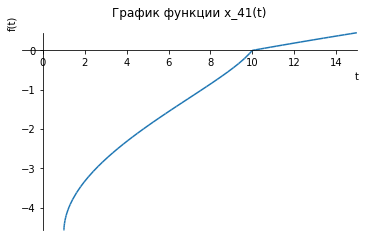

In [5]:
t_curr = t0
for i in range(41):
    t_prev = t_curr
    t_curr = x.subs(xn1, t_prev)

sp.plot(t_curr, (t, -1, 15), title='График функции x_41(t)')

Поскольку аналитическая запись функции $x_{41}(t)$ потребовала слишком много места, то в качестве ответа построили ее график.